<a href="https://colab.research.google.com/github/Harsh-eng568/Phone-Price-Intelligence/blob/main/EDA_on_smartphone_and_ML_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import KNNImputer

# **Project Title: Mobile Price Prediction and Classification**  

## **Project Goal**  
The project aims to analyze a smartphone dataset to understand the **factors influencing mobile prices** and build models for **price prediction and classification**.

---

## **Data Used**  
The dataset **'smartphone_cleaned_v5.csv'** contains information about various smartphones, including:  
- **Brand**  
- **Price**  
- **Technical specifications**  
- **Features** (e.g., processor, RAM, battery, etc.)

---

## **Steps & Analysis Performed**  

### **1. Exploratory Data Analysis (EDA)**  
- Explored the dataset structure, statistics, and distributions.  
- Visualized price distribution, brand popularity, and feature relationships using **Pandas, Matplotlib, and Seaborn**.  
- Identified and handled missing data.

### **2. Price Prediction**  
- Applied **feature engineering**:  
  - One-hot encoding & label encoding for categorical variables like **brand** and **OS**.  
- Used **feature selection** to identify the most correlated features with price.  
- Applied **regression models** (e.g., `RandomForestRegressor`) to predict smartphone prices.  
- Evaluated performance using:  
  - **Mean Squared Error (MSE)**  
  - **R-squared (R²) score**  

### **3. Price Classification**  
- Defined a **binary classification problem** by categorizing smartphones into:  
  - **High Price**  
  - **Low Price**  
  *(Based on the median price threshold)*  
- Used **ANOVA F-test** for feature selection to find the **top 10 most relevant features**.  
- Trained a **Logistic Regression model** for classification.  
- Optimized using **GridSearchCV** to tune hyperparameters (`C` and `max_iter`).  
- Evaluated classification performance using:  
  - **Accuracy**  
  - **Precision**  
  - **Recall**  

---

## **Outcome & Key Findings**  
✅ **Insights into factors influencing mobile prices**.  
✅ **Developed a regression model** to predict smartphone prices.  
✅ **Built a classification model** for categorizing mobile prices.  

### **Key Findings:**  
- **Price is influenced by factors such as brand, processor, RAM, and specifications.**  
- **ANOVA F-test identified the top 10 features for classification.**  
- **Logistic Regression achieved a certain accuracy in classifying mobile prices.**  

---

## **Further Analysis & Improvements**  
🚀 **Test alternative regression and classification models** for better performance.  
🚀 **Incorporate additional features or datasets** for more comprehensive analysis.  
🚀 **Deploy the model for real-world smartphone price prediction.**  


In [5]:
df = pd.read_csv('/content/smartphone_cleaned_v5.csv')
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [6]:
df.shape

(980, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [8]:
df.isnull().sum()

,0
brand_name,0
model,0
price,0
rating,101
has_5g,0
has_nfc,0
has_ir_blaster,0
processor_brand,20
num_cores,6
processor_speed,42


<Axes: xlabel='brand_name'>

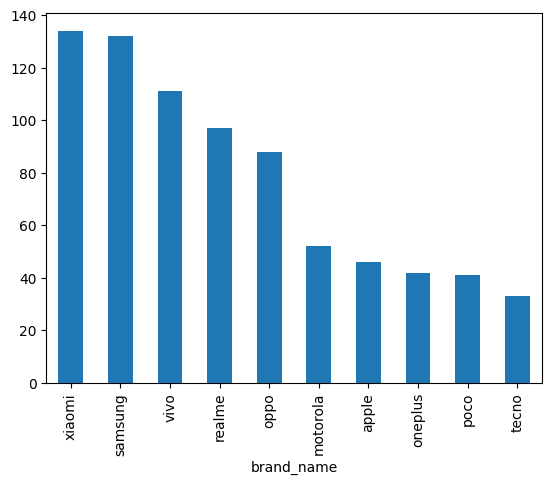

In [9]:
df['brand_name'].value_counts().head(10).plot(kind = 'bar')

<Axes: ylabel='count'>

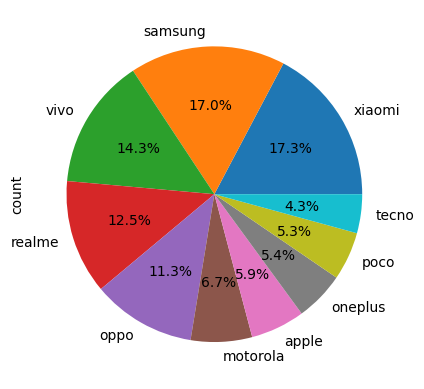

In [10]:
df['brand_name'].value_counts().head(10).plot(kind = 'pie',autopct = '%0.1f%%')

In [11]:
df['price'].describe()

,price
count,980.000000
mean,32520.504082
std,39531.812669
min,3499.000000
25%,12999.000000
50%,19994.500000
75%,35491.500000
max,650000.000000


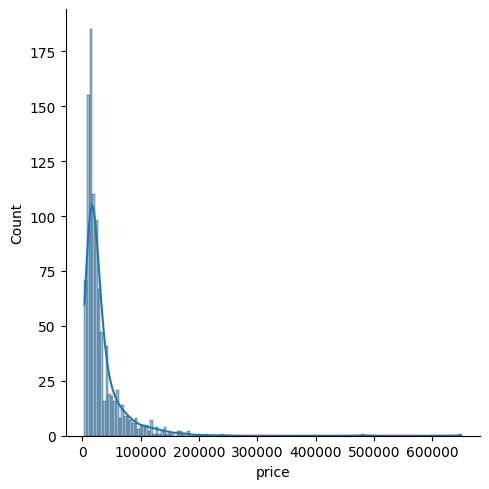

In [12]:
sns.displot(kind = 'hist', data = df, x = 'price', kde = True)

In [13]:
df['price'].skew()

np.float64(6.591790999665567)

<Axes: ylabel='price'>

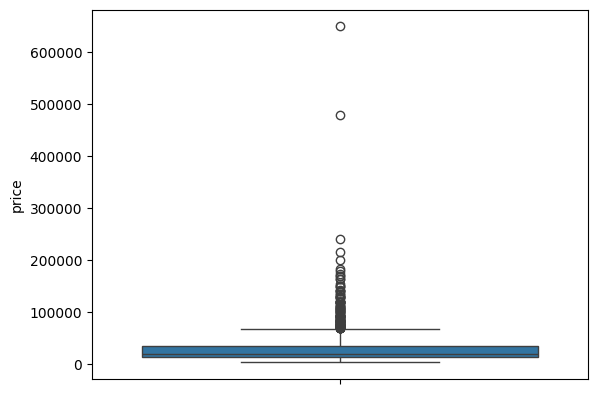

In [14]:
sns.boxplot(df['price'])

In [15]:
df[df['price']  > 200000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.50,...,4.70,60,1080 x 1920,1,1.0,android,13.0,2.1,0,NaN
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,snapdragon,8.0,3.20,...,6.74,120,1212 x 2616,3,1.0,other,50.0,13.0,1,256.0
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,8.0,2.80,...,6.39,60,1080 x 2340,3,1.0,android,48.0,20.0,0,NaN
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,kirin,8.0,2.86,...,6.53,60,1176 x 2400,4,2.0,android,40.0,32.0,1,256.0


In [16]:
df['rating'].describe()

,rating
count,879.000000
mean,78.258248
std,7.402854
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


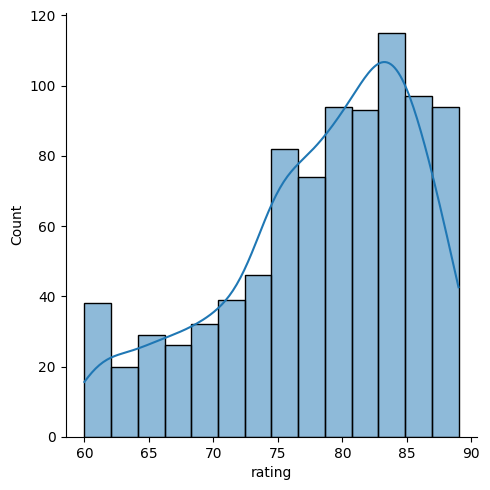

In [17]:
sns.displot(kind = 'hist',data = df, x = 'rating', kde = True)

In [18]:
df['rating'].skew()

np.float64(-0.6989993034105535)

<Axes: ylabel='rating'>

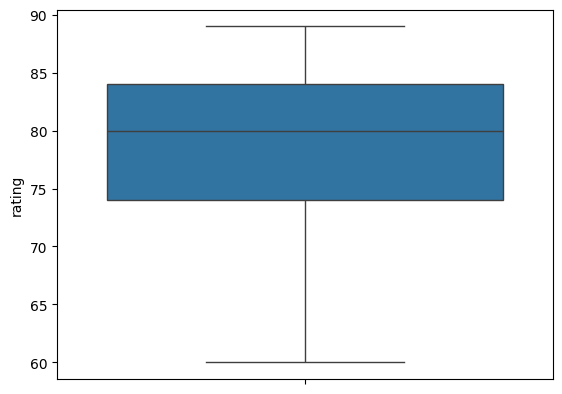

In [19]:
sns.boxplot(df['rating'])

In [20]:
df['rating'].isnull().sum()/980

np.float64(0.10306122448979592)

<Axes: ylabel='count'>

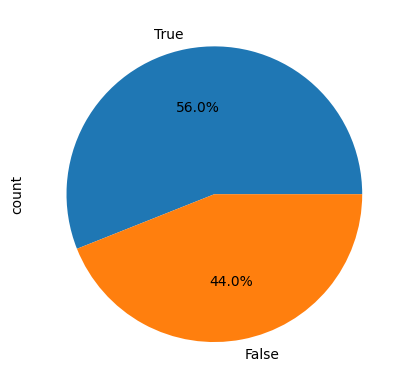

In [21]:
df['has_5g'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')

<Axes: ylabel='count'>

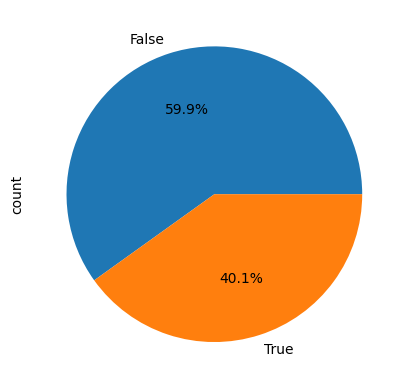

In [22]:
df['has_nfc'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')

<Axes: ylabel='count'>

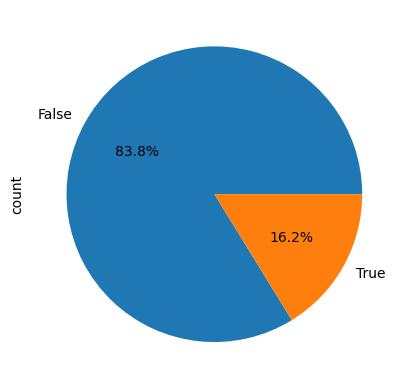

In [23]:
df['has_ir_blaster'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')

<Axes: xlabel='brand_name'>

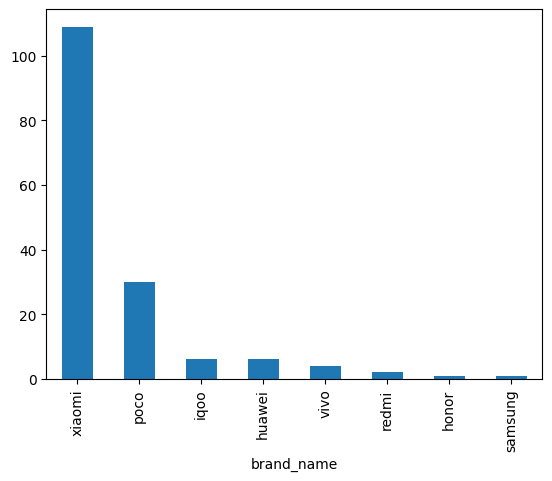

In [24]:
df[df['has_ir_blaster'] == True]['brand_name'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

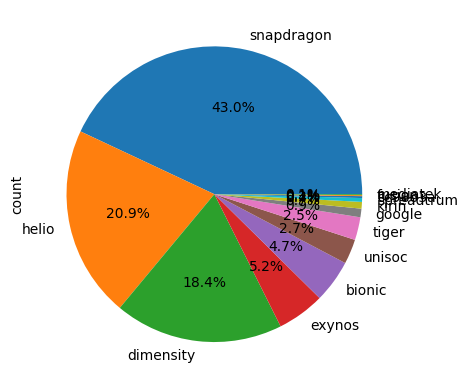

In [25]:
df['processor_brand'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')

<Axes: ylabel='count'>

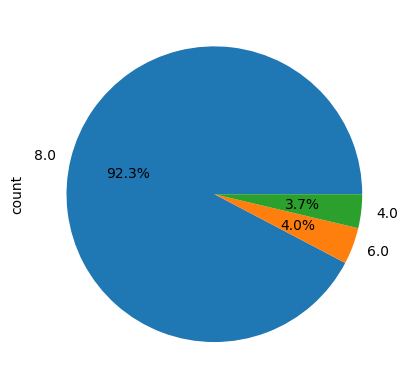

In [26]:
df['num_cores'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')

<Axes: ylabel='count'>

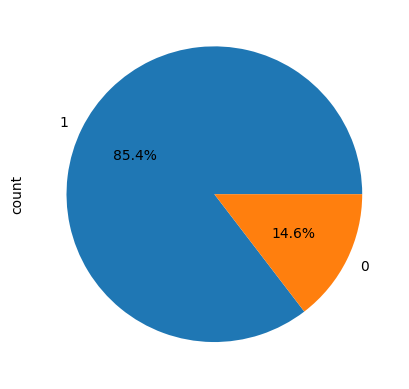

In [27]:
df['fast_charging_available'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')

<Axes: ylabel='count'>

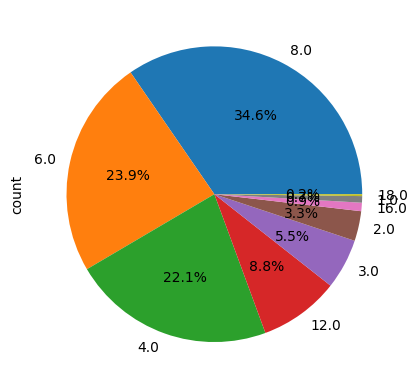

In [28]:
df['ram_capacity'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')

<Axes: ylabel='count'>

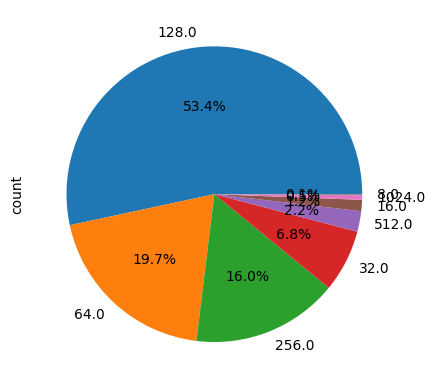

In [29]:
df['internal_memory'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')

<Axes: ylabel='count'>

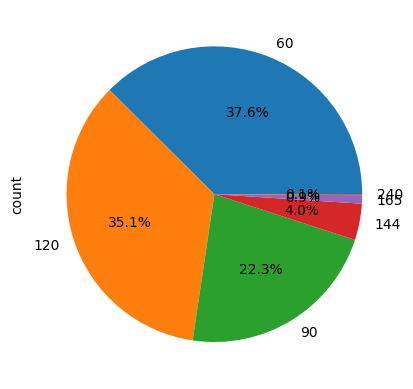

In [30]:
df['refresh_rate'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')

In [31]:
df['refresh_rate'].value_counts()

,count
refresh_rate,
60,368
120,344
90,219
144,39
165,9
240,1


<Axes: ylabel='count'>

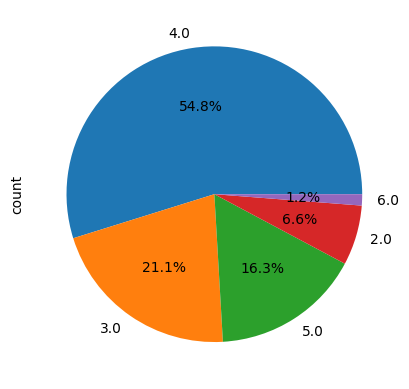

In [32]:
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().plot(kind = 'pie',autopct = '%0.1f%%')

<Axes: ylabel='count'>

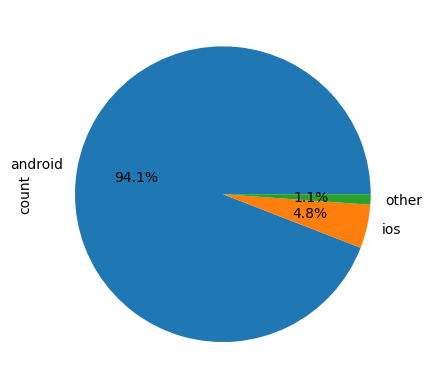

In [33]:
df['os'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')

<Axes: ylabel='count'>

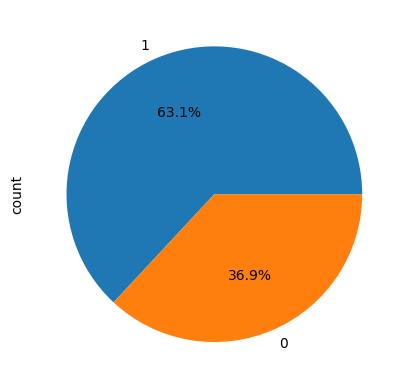

In [34]:
df['extended_memory_available'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')

<Axes: ylabel='count'>

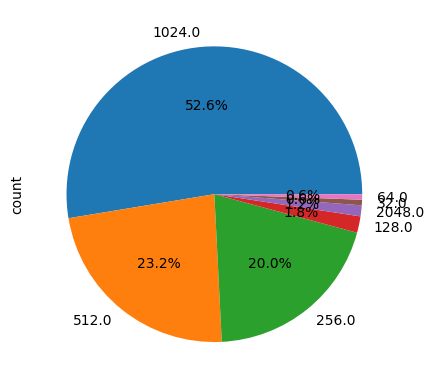

In [35]:
df['extended_upto'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')

In [36]:
def plot_graphs(column_name):
  sns.displot(kind = 'hist', kde = True, data = df, x = column_name, label = column_name)
  sns.boxplot(df[column_name])

In [37]:
num_columns = df.select_dtypes(include = ['float64', 'int64']).iloc[[3,4,6,9,13,14,16]].columns

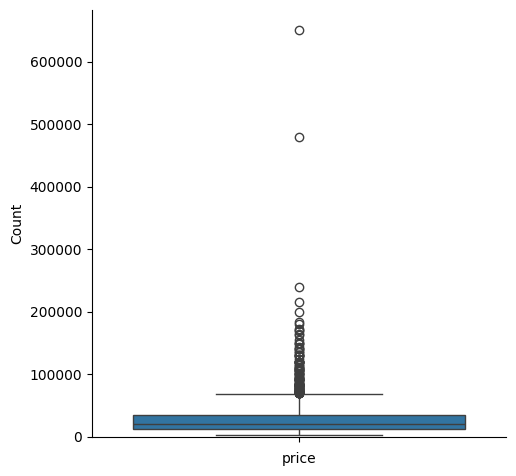

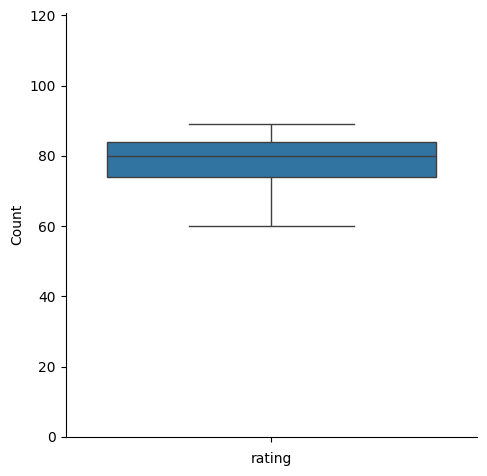

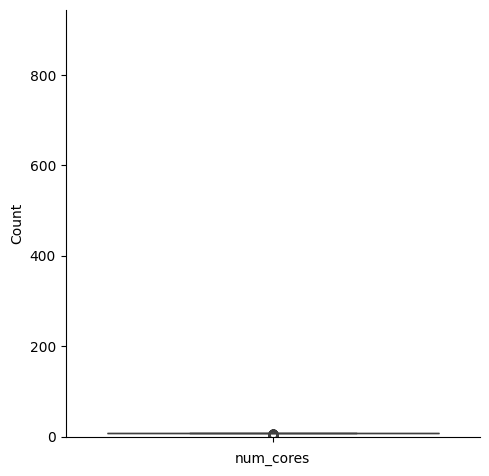

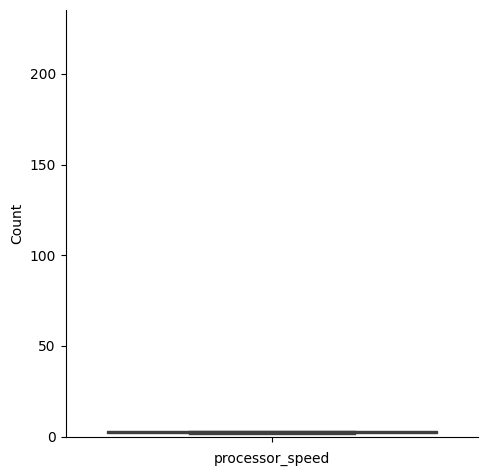

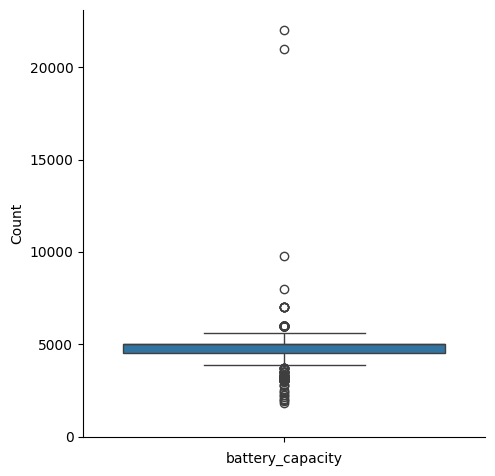

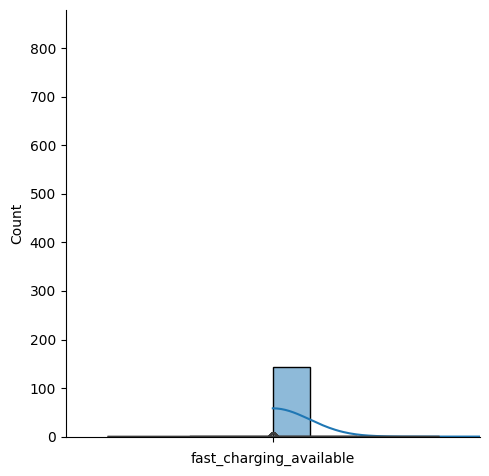

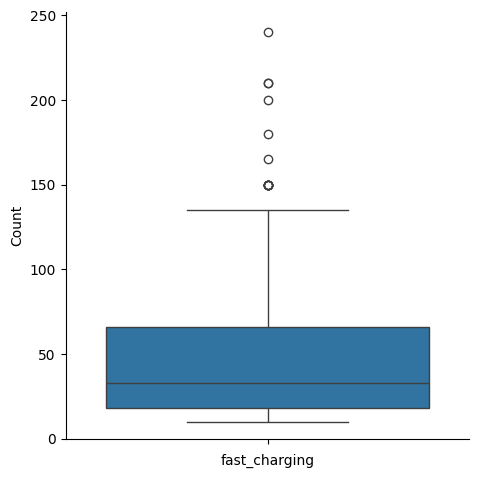

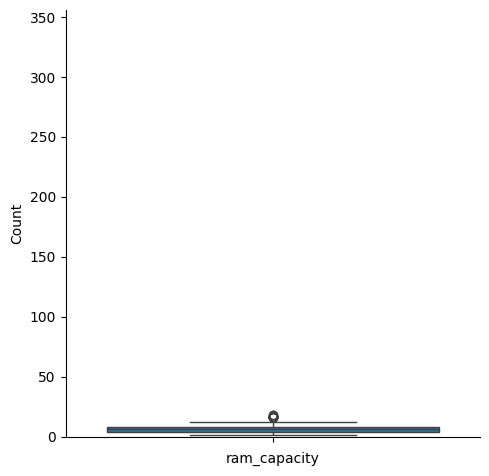

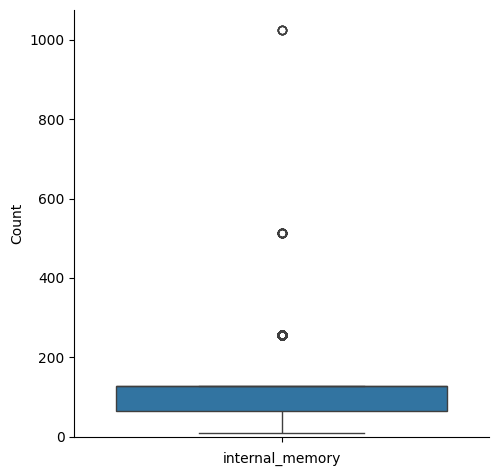

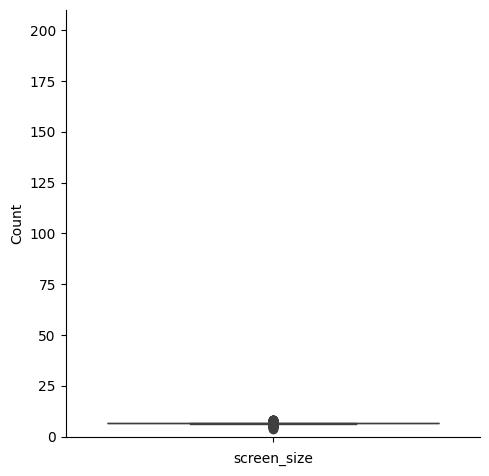

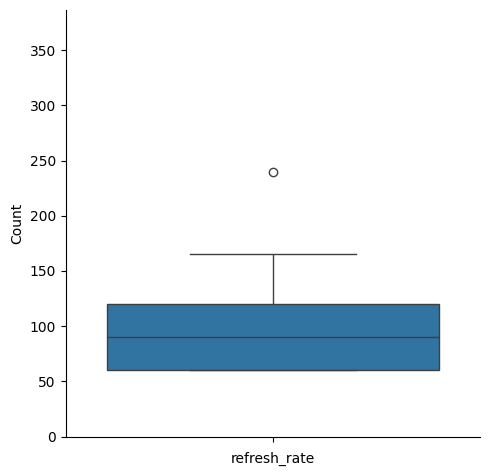

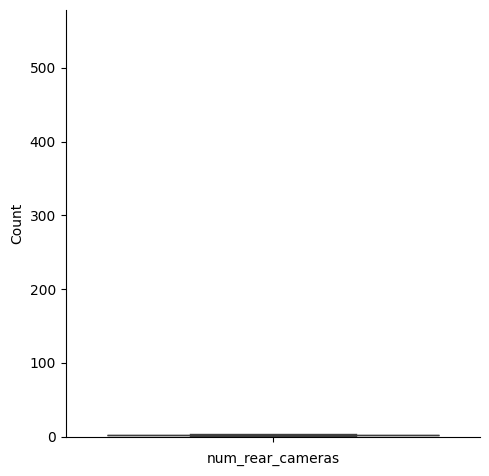

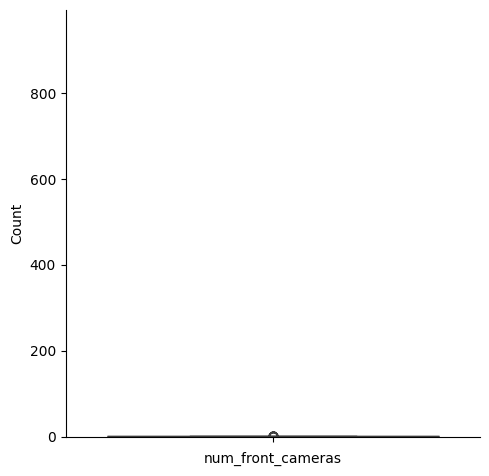

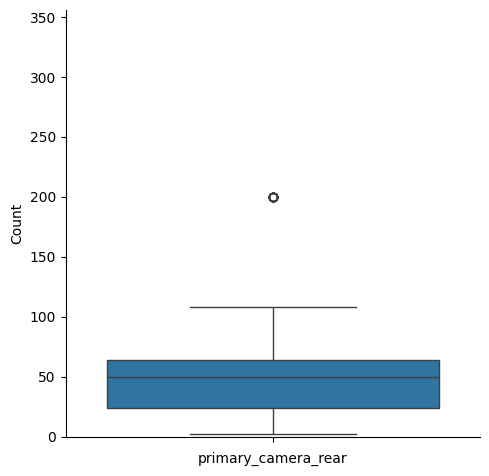

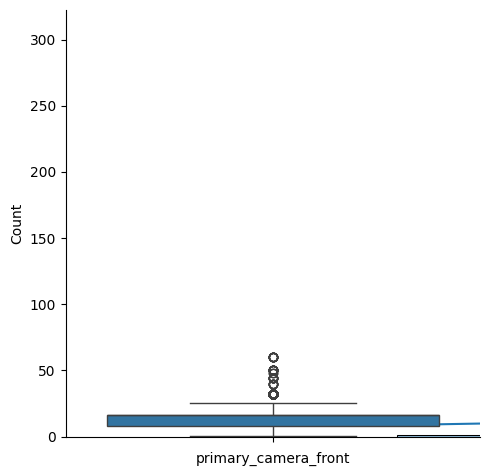

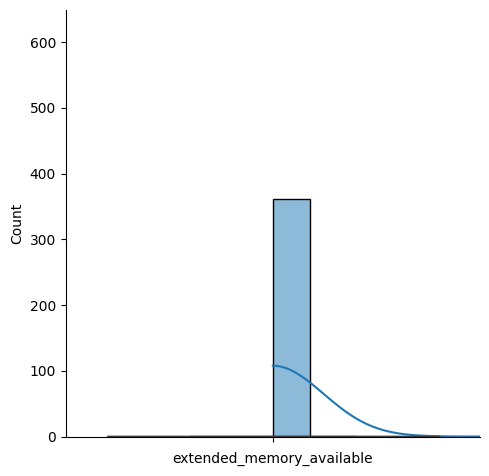

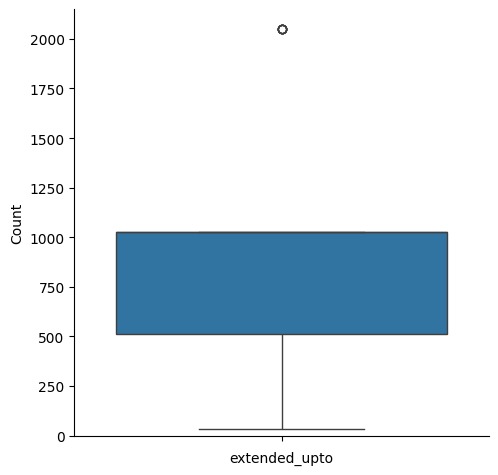

In [38]:
for col in num_columns:
  plot_graphs(col)

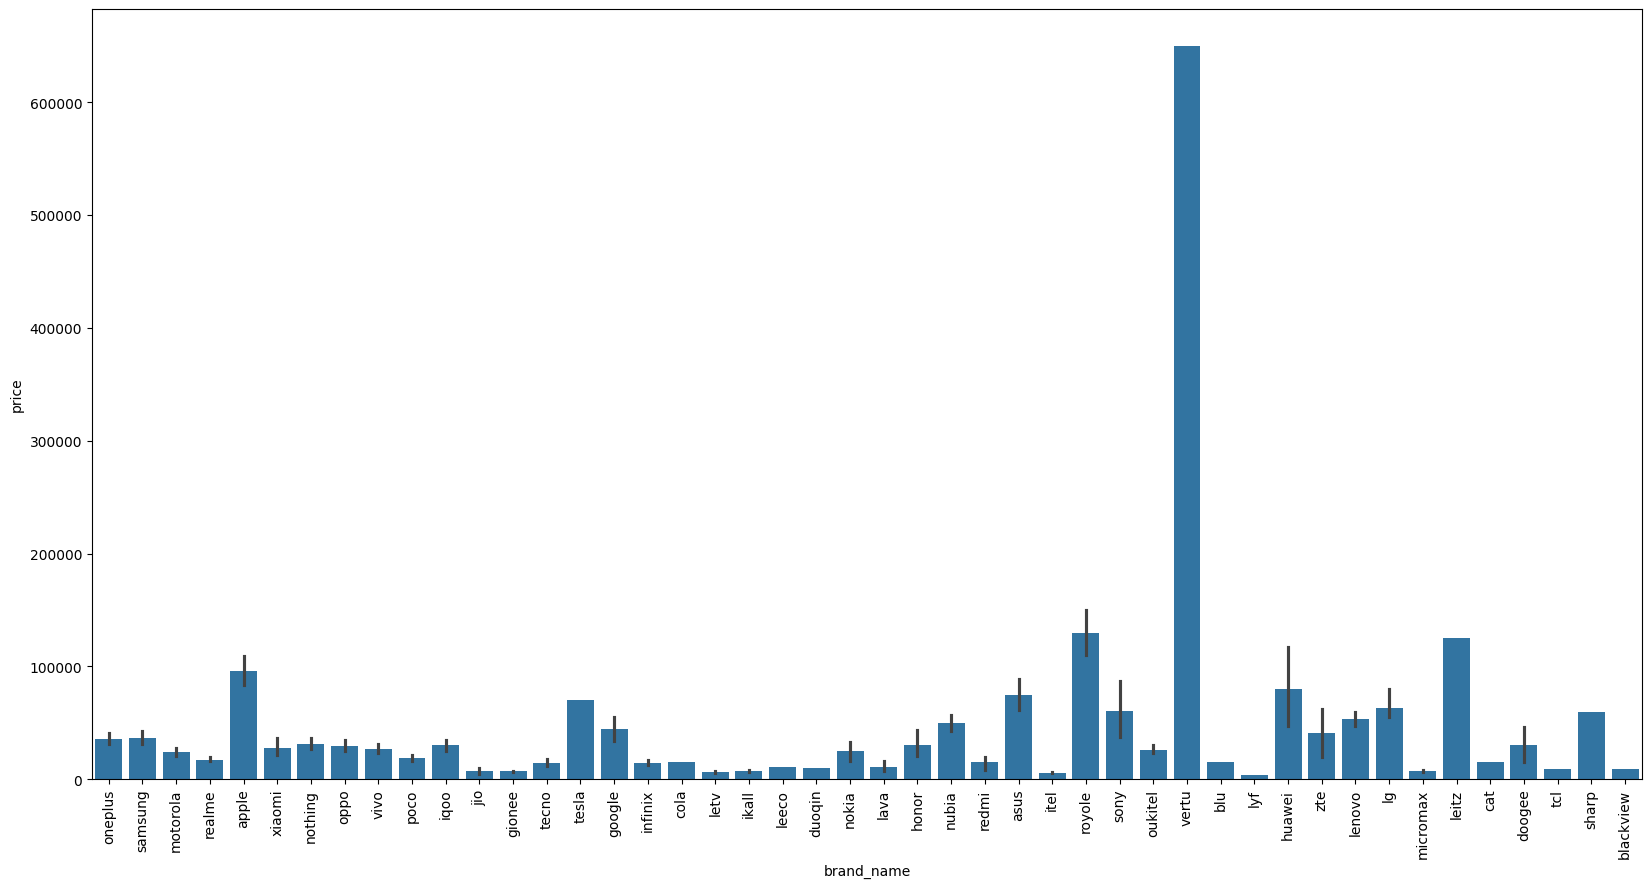

In [39]:
plt.figure(figsize = (20,10))
sns.barplot(data = df, x = 'brand_name', y = 'price')

plt.xticks(rotation=90)
plt.show()

In [40]:
x = df.groupby('brand_name').count()['model']

In [41]:
temp_df = df['brand_name'].isin(x[x > 10].index)

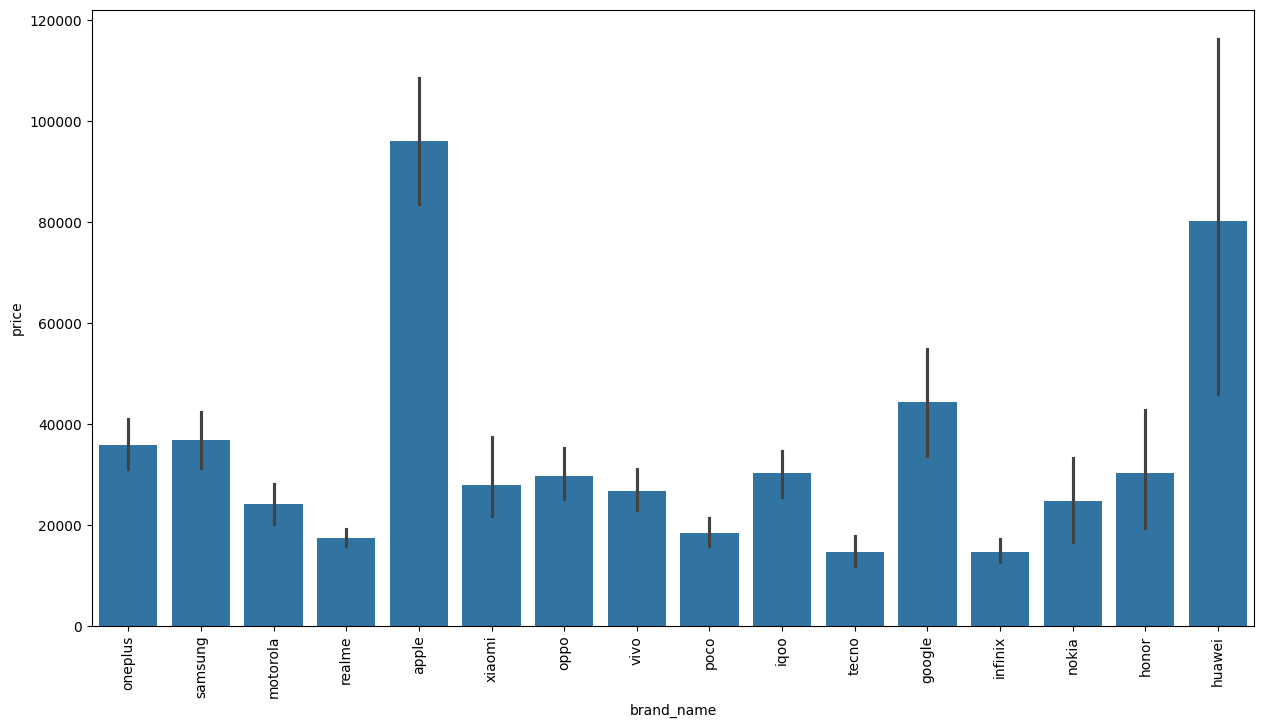

In [42]:
plt.figure(figsize = (15,8))
sns.barplot(data = df[temp_df], x = 'brand_name', y = 'price')

plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='rating', ylabel='price'>

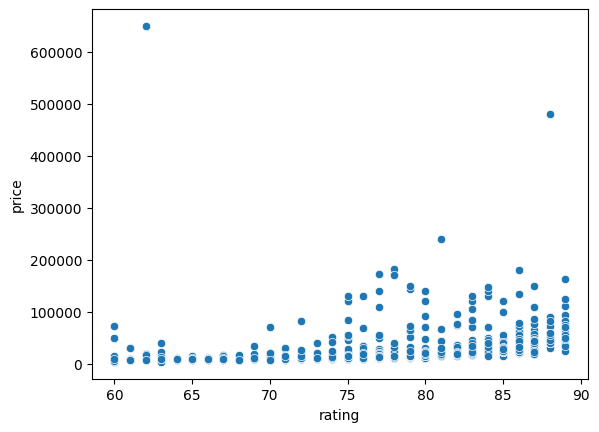

In [43]:
sns.scatterplot(data = df, x = 'rating', y = 'price')

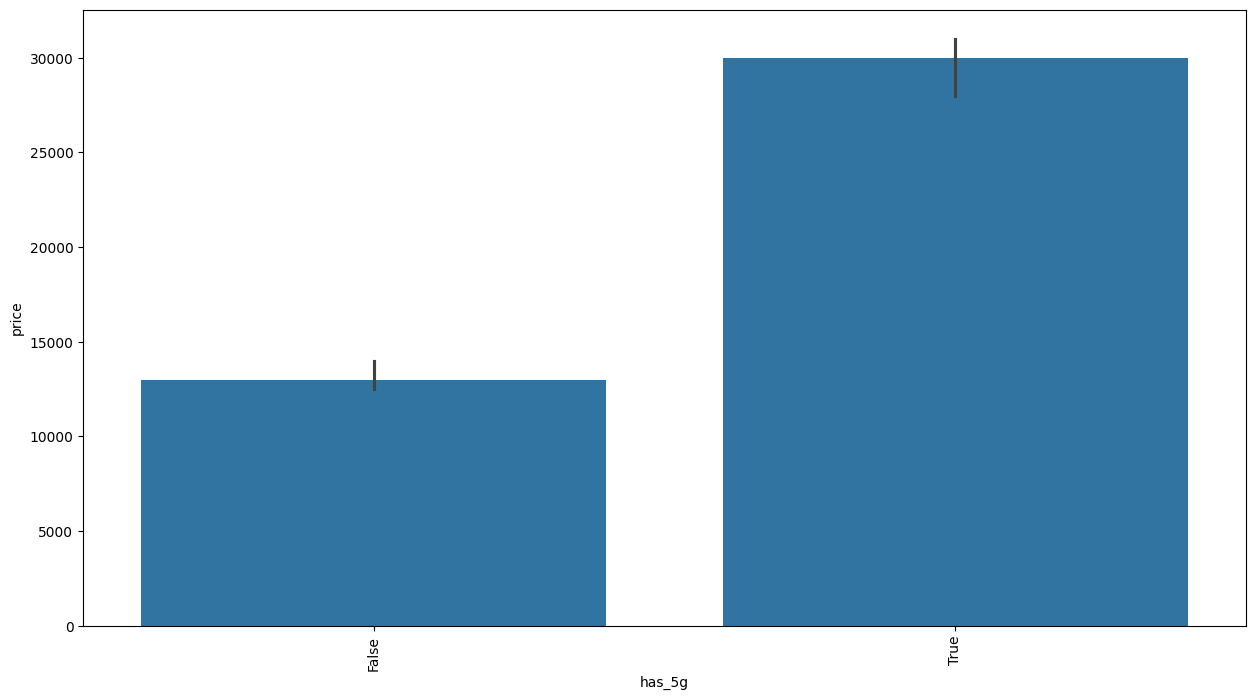

In [44]:
plt.figure(figsize = (15,8))
filtered_df = df[df['brand_name'].isin(x[x > 10].index)]
sns.barplot(data = filtered_df, x = 'has_5g', y = 'price',estimator = np.median)

plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='has_ir_blaster', ylabel='price'>

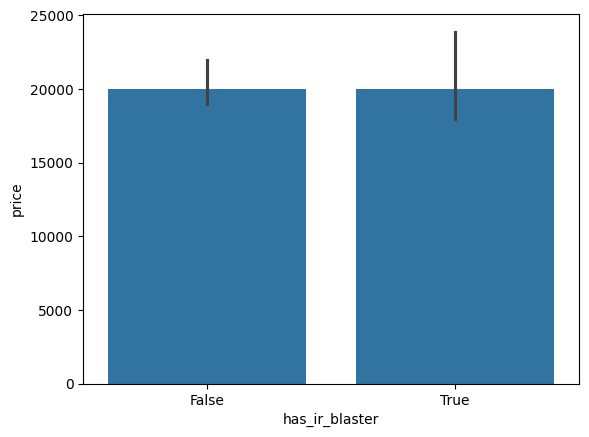

In [45]:
sns.barplot(data = filtered_df, x = 'has_ir_blaster', y = 'price',estimator = np.median)

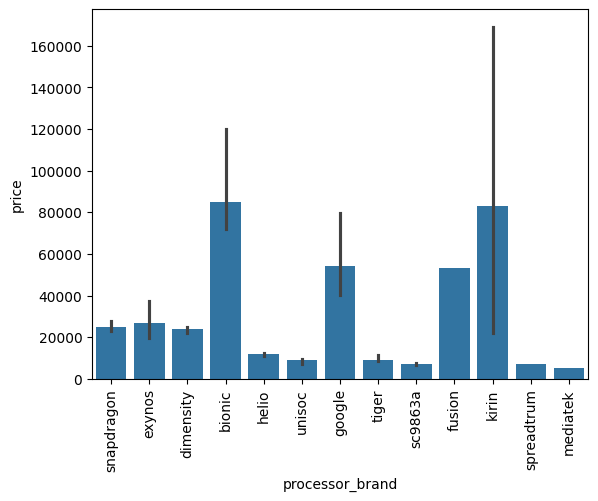

In [46]:
sns.barplot(data = filtered_df, x = 'processor_brand', y = 'price',estimator = np.median)
plt.xticks(rotation=90)
plt.show()

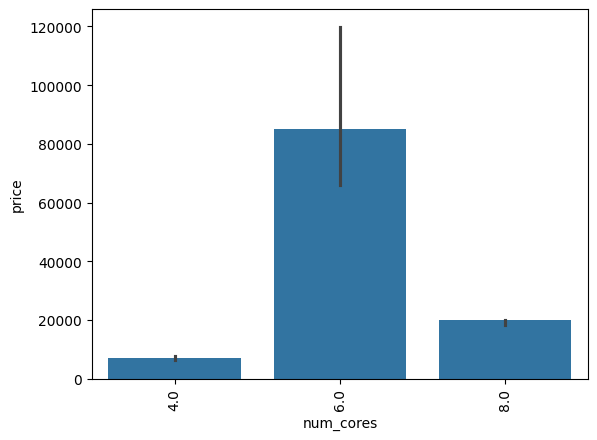

In [47]:
sns.barplot(data = filtered_df, x = 'num_cores', y = 'price',estimator = np.median)
plt.xticks(rotation=90)
plt.show()

In [48]:
pd.crosstab(df['num_cores'],df['os'])

os,android,ios,other
num_cores,,,
4.0,33,1,1
6.0,0,39,0
8.0,875,1,10


<Axes: xlabel='processor_speed', ylabel='price'>

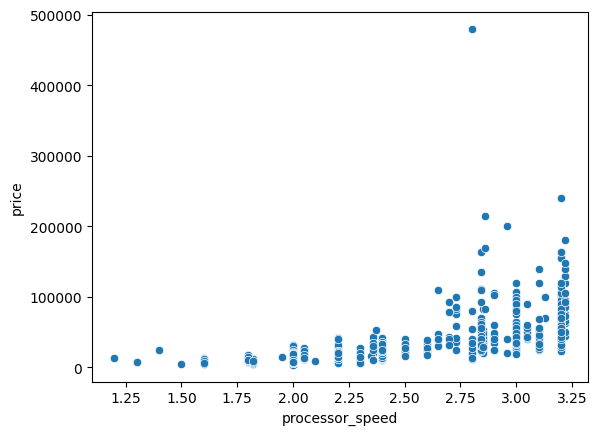

In [49]:
sns.scatterplot(data = filtered_df, x = 'processor_speed', y = 'price')

<Axes: xlabel='screen_size', ylabel='price'>

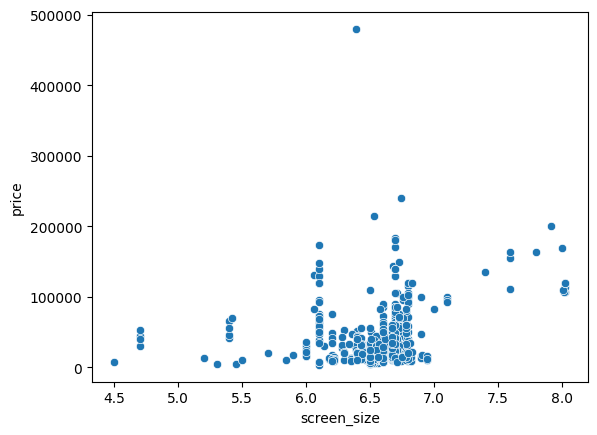

In [50]:
sns.scatterplot(data = filtered_df, x = 'screen_size', y = 'price')

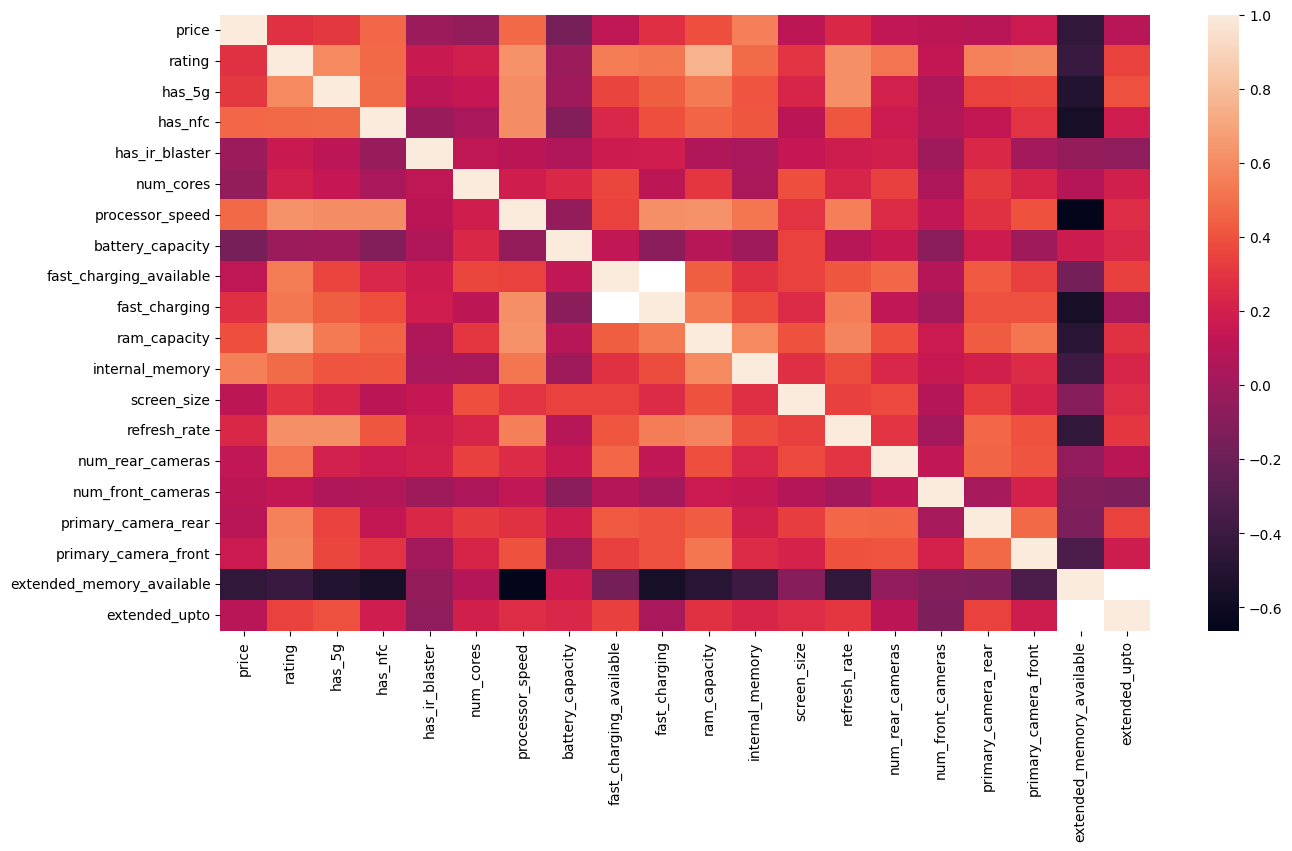

In [54]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(numeric_only=True))
plt.show()

In [55]:
df.corr(numeric_only=True)['price']

,price
price,1.000000
rating,0.283504
has_5g,0.305066
has_nfc,0.470951
has_ir_blaster,-0.015807
num_cores,-0.048561
processor_speed,0.474049
battery_capacity,-0.159232
fast_charging_available,0.116739
fast_charging,0.277591


In [59]:
x_df = df.select_dtypes(include = ['int64','float64']).drop(columns = 'price')

In [60]:
imputer = KNNImputer(n_neighbors=5)
x_df_values = imputer.fit_transform(x_df)

In [61]:
x_df['price'] = df['price']

In [62]:
x_df.head()

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,price
0,89.0,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,3,1.0,50.0,16.0,0,NaN,54999
1,81.0,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,3,1.0,64.0,16.0,1,1024.0,19989
2,75.0,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,3,1.0,50.0,13.0,1,1024.0,16499
3,81.0,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,3,1.0,50.0,16.0,1,1024.0,14999
4,82.0,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,3,1.0,108.0,16.0,0,NaN,24999


In [65]:
 a = x_df.corr(numeric_only=True)['price'].reset_index()

In [66]:
 b = df.corr(numeric_only=True)['price'].reset_index()

In [67]:
b.merge(a,on = 'index')

,index,price_x,price_y
0,price,1.000000,1.000000
1,rating,0.283504,0.283504
2,num_cores,-0.048561,-0.048561
3,processor_speed,0.474049,0.474049
4,battery_capacity,-0.159232,-0.159232
5,fast_charging_available,0.116739,0.116739
6,fast_charging,0.277591,0.277591
7,ram_capacity,0.386002,0.386002
8,internal_memory,0.557168,0.557168
9,screen_size,0.113253,0.113253


In [69]:
numerical_df = pd.get_dummies(df,columns = ['brand_name','processor_brand','os'],drop_first=True).select_dtypes(include=['number'])
numerical_df.corr()['price']

,price
price,1.000000
rating,0.283504
num_cores,-0.048561
processor_speed,0.474049
battery_capacity,-0.159232
fast_charging_available,0.116739
fast_charging,0.277591
ram_capacity,0.386002
internal_memory,0.557168
screen_size,0.113253


In [70]:
df

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,...,6.67,120,1080 x 2460,3,1.0,android,64.0,16.0,0,NaN
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,...,6.50,60,720 x 1600,3,1.0,android,48.0,8.0,1,1024.0
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,...,6.60,144,1080 x 2460,3,1.0,android,64.0,16.0,0,NaN
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8.0,2.20,...,6.80,60,1080 x 2400,3,1.0,android,108.0,32.0,1,1024.0


# **Logistic Regression Analysis on Mobile Price Classification**

## **Overview**
We performed a **binary classification** on the mobile price dataset using **logistic regression**, where the target variable (`price_category`) was defined based on whether a mobile’s price was above or below the median price.

---

## **Key Steps and Findings**  

### **1. Data Preprocessing**
- Missing values were **dropped**.
- Categorical variables (`brand_name`, `processor_brand`, and `os`) were **encoded** using `LabelEncoder`.
- The dataset was **standardized** using `StandardScaler` to ensure uniform feature scaling.

### **2. Feature Selection**
- **ANOVA F-test (SelectKBest)** was used to select the **top 10 most important features** based on their correlation with the target variable.

### **3. Model Training & Optimization**
- A **Logistic Regression** model was trained.
- **GridSearchCV** was used to **tune hyperparameters** for optimal performance.
- The best hyperparameters were identified.

---

## **Model Performance**
- **Best Parameters:**  
  ```python
  {'C': <best_value>, 'max_iter': <best_value>}


In [ ]:
#  logistic regression

In [78]:
df = df.dropna()

# Encoding categorical variables
label_encoders = {}
categorical_cols = ['brand_name', 'processor_brand', 'os']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
df['price_category'] = (df['price'] > df['price'].median()).astype(int)
y = df['price_category']
X = df.drop(columns=['price', 'price_category'])

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using ANOVA F-test
best_k = min(10, X_scaled.shape[1])
selector = SelectKBest(f_classif, k=best_k)
X_new = selector.fit_transform(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Logistic Regression Model with Hyperparameter Tuning
log_reg = LogisticRegression()
param_grid = {'C': [0.1, 1, 10], 'max_iter': [100, 200, 500]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred_log = grid_search.best_estimator_.predict(X_test)
print("Best Logistic Regression Parameters:", grid_search.best_params_)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# Classification Report
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_log))


Best Logistic Regression Parameters: {'C': 0.1, 'max_iter': 100}
Logistic Regression Accuracy: 0.7605633802816901

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77        38
           1       0.72      0.79      0.75        33

    accuracy                           0.76        71
   macro avg       0.76      0.76      0.76        71
weighted avg       0.76      0.76      0.76        71



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 9 20] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
